In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import string
import nltk
import pickle

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.svm import LinearSVC

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer



from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from math import *


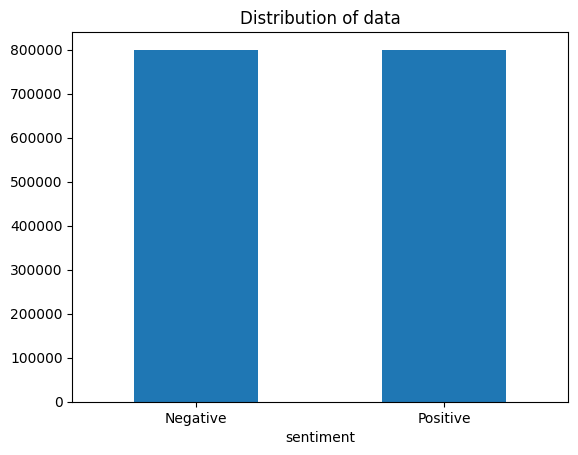

In [9]:
# Importing the dataset
DATASET_COLUMNS  = ["sentiment", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"

dataset = pd.read_csv('data.csv',
                      encoding=DATASET_ENCODING , names=DATASET_COLUMNS)
dataset.head(5)

dataset.to_parquet("data.parquet")
dataset = pd.read_parquet("data.parquet")

# Replacing the values to ease understanding.
dataset['sentiment'] = dataset['sentiment'].replace(4,1)
# Removing the unnecessary columns.
dataset = dataset[['sentiment','text']]

# Plotting the distribution for dataset.
ax = dataset['sentiment'].value_counts().sort_index().plot(kind='bar', title='Distribution of data', legend=False)
ax.set_xticklabels(['Negative', 'Positive'], rotation=0)


# Storing data in lists.
text, sentiment = list(dataset['text']), list(dataset['sentiment'])

In [10]:

# Preprocessing the data

# Combine all data cleaning functions into one preprocessing function
def preprocess_text(text):
    text = remove_html_tags(text)
    text = remove_urls(text)
    text = convert_to_lowercase(text)
    text = replace_chat_words(text)
    text = remove_punctuation(text)
    text = remove_stopwords(text)
    text = remove_whitespace(text)
    text = remove_special_characters(text)
    return text
# Function to remove punctuation
def remove_punctuation(text):
    clean_text = ''.join(ch for ch in text if ch not in string.punctuation)
    return clean_text

# Function to remove stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

import string

# Function to convert text to lowercase
def convert_to_lowercase(text):
    return text.lower()

# Function to replace chat words
def replace_chat_words(text):
    chat_words = {
        "BRB": "Be right back",
        "BTW": "By the way",
        "OMG": "Oh my God/goodness",
        "TTYL": "Talk to you later",
        "OMW": "On my way",
        "SMH/SMDH": "Shaking my head/shaking my darn head",
        "LOL": "Laugh out loud",
        "TBD": "To be determined", 
        "IMHO/IMO": "In my humble opinion",
        "HMU": "Hit me up",
        "IIRC": "If I remember correctly",
        "LMK": "Let me know", 
        "OG": "Original gangsters (used for old friends)",
        "FTW": "For the win", 
        "NVM": "Nevermind",
        "OOTD": "Outfit of the day", 
        "Ngl": "Not gonna lie",
        "Rq": "real quick", 
        "Iykyk": "If you know, you know",
        "Ong": "On god (I swear)", 
        "YAAAS": "Yes!", 
        "Brt": "Be right there",
        "Sm": "So much",
        "Ig": "I guess",
        "Wya": "Where you at",
        "Istg": "I swear to god",
        "Hbu": "How about you",
        "Atm": "At the moment",
        "Asap": "As soon as possible",
        "Fyi": "For your information"
    }
    for word, expanded_form in chat_words.items():
        text = text.replace(word, expanded_form)
    return text
 #Function to remove HTML tags
def remove_html_tags(text):
    clean_text = re.sub(r'<.*?>', '', text)
    return clean_text

# Function to remove URLs
def remove_urls(text):
    clean_text = re.sub(r'http\S+', '', text)
    return clean_text

# Function to remove whitespace
def remove_whitespace(text):
    return text.strip()

# Function to remove special characters
def remove_special_characters(text):
    clean_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return clean_text


In [11]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   text       1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [12]:
# Apply preprocessing function to DataFrame

dataset['text'] = dataset['text'].apply(preprocess_text)



In [13]:
dataset.head(5)

,sentiment,text
0,0,switchfoot awww thats bummer shoulda got david...
1,0,upset cant update facebook texting might cry r...
2,0,kenichan dived many times ball managed save 50...
3,0,whole body feels itchy like fire
4,0,nationwideclass behaving im mad cant see


In [ ]:
# analyzing different classifiers, we are doing Linear SVC, Linear Regression, Naive Bayes

# 1. Linear Regression 

# Convert tokenized text to BoW features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(dataset['text'])

# Dataset is our DataFrame with the target column modified
y = dataset['sentiment']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train logistic regression model
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)

# Predict on the testing set
y_pred = logreg.predict(X_test)



In [ ]:
# 2. Linear SVC

SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)


In [ ]:
# 3. Naive Bayes
# Initialize and train Naive Bayes model
cnb = ComplementNB()
# Fit the model to the training data
cnb.fit(X_train, y_train)
cross_cnb = cross_val_score(cnb, X, y,n_jobs = -1)
print("Cross Validation score = ",cross_cnb)                
print ("Train accuracy ={:.2f}%".format(cnb.score(X_train,y_train)*100))
print ("Test accuracy ={:.2f}%".format(cnb.score(X_test,y_test)*100))
train_acc_cnb=cnb.score(X_train,y_train)
test_acc_cnb=cnb.score(X_test,y_test)

In [ ]:
def model_Evaluate(model):
    plt.figure(figsize=(6, 4))  # Create a new figure with a set size

    # Predict values for the test dataset
    y_pred = model.predict(X_test)

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print evaluation metrics
    print(f"Model: {model}")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy:.4f}\n")
    
    # Compute and plot the confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories = ['Negative', 'Positive']
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    sns.heatmap(cf_matrix, annot=labels, cmap='Blues', fmt='',
                xticklabels=categories, yticklabels=categories)

    plt.xlabel("Predicted Values", fontdict={'size': 14}, labelpad=10)
    plt.ylabel("Actual Values", fontdict={'size': 14}, labelpad=10)
    plt.title("Confusion Matrix", fontdict={'size': 18}, pad=20)

    plt.show()  # Ensure the heatmap is displayed before moving to the next one

    return accuracy


In [ ]:
model_Evaluate(logreg)
model_Evaluate(cnb)
model_Evaluate(SVCmodel)



In [ ]:
# Dictionary to store model accuracies
model_accuracies = {}

# Evaluate each model and store accuracy
model_accuracies["Logistic Regression"] = model_Evaluate(logreg, "Logistic Regression")
model_accuracies["Naïve Bayes"] = model_Evaluate(cnb, "Naïve Bayes")
model_accuracies["SVC"] = model_Evaluate(SVCmodel, "Support Vector Classifier")

# Convert dictionary to a DataFrame for better visualization
accuracy_df = pd.DataFrame.from_dict(model_accuracies, orient='index', columns=['Accuracy'])
print("\nModel Comparison:\n", accuracy_df)

# Find the best model
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_model = {"Logistic Regression": logreg, "Naïve Bayes": cnb, "SVC": SVCmodel}[best_model_name]
print(f"\nBest Model: {best_model_name} with accuracy: {model_accuracies[best_model_name]:.4f}")

In [ ]:
# Save the vectorizer
with open('vectorizer-ngram-(1,2).pickle', 'wb') as file:
    pickle.dump(vectorizer, file)

# Save ONLY the best model
best_model_filename = f'Sentiment-{best_model_name.replace(" ", "")}.pickle'
with open(best_model_filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f"\nBest model saved as: {best_model_filename}")

In [ ]:
def preprocess(text):
    preprocess_text(text)  # Assuming preprocess_text() is defined elsewhere
    return text

def load_models():
    '''
    Load the saved vectorizer and the best-performing model.
    '''
    
    # Load the vectorizer
    with open('./vectorizer-ngram-(1,2).pickle', 'rb') as file:
        vectorizer = pickle.load(file)

    # Identify the best model file (the only Sentiment-*.pickle file)
    import glob
    model_files = glob.glob("./Sentiment-*.pickle")  # Find the saved model file

    if not model_files:
        raise FileNotFoundError("No trained model file found!")

    best_model_file = model_files[0]  # There should be only one file
    print(f"Loading model: {best_model_file}")  # Debugging output

    # Load the best model
    with open(best_model_file, 'rb') as file:
        best_model = pickle.load(file)

    return vectorizer, best_model

def predict(vectorizer, model, text):
    # Predict the sentiment
    textdata = vectorizer.transform(preprocess(text))
    sentiment = model.predict(textdata)

    # Make a list of text with sentiment
    data = list(zip(text, sentiment))

    # Convert the list into a Pandas DataFrame
    df = pd.DataFrame(data, columns=['text', 'sentiment'])
    df = df.replace([0, 1], ["Negative", "Positive"])
    return df

if __name__ == "__main__":
    # Load the models
    vectorizer, best_model = load_models()
    
    # Ask the user for input text
    user_input = input("Enter sentences separated by a comma: ")
    text = [sentence.strip() for sentence in user_input.split(",")]

    # Predict and display results
    df = predict(vectorizer, best_model, text)
    print(df)


